### 加载数据集

In [208]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
  
# fetch dataset 
phishing_websites = fetch_ucirepo(id=379) 
  
# data (as pandas dataframes) 
# phishing_websites.data.features为X，phishing_websites.data.targets为y，都是pandas的DataFrame

data = pd.concat([phishing_websites.data.features, phishing_websites.data.targets ], axis=1)

# metadata 
print(phishing_websites.metadata) 
  
# variable information 
print(phishing_websites.variables) 



{'uci_id': 379, 'name': 'Website Phishing', 'repository_url': 'https://archive.ics.uci.edu/dataset/379/website+phishing', 'data_url': 'https://archive.ics.uci.edu/static/public/379/data.csv', 'abstract': '\n\n', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1353, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Result'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2014, 'last_updated': 'Thu Mar 21 2024', 'dataset_doi': '10.24432/C5B301', 'creators': ['Neda Abdelhamid'], 'intro_paper': {'title': 'Phishing detection based Associative Classification data mining', 'authors': 'Neda Abdelhamid, A. Ayesh, F. Thabtah', 'published_in': 'Expert systems with applications', 'year': 2014, 'url': 'https://www.semanticscholar.org/paper/867e2293e9780b729705b4ba48d6b11e3778e999', 'doi': '10.1016/j.eswa.2014.03.019'}, 'additional_info': {'summ

### 加载相关包

In [209]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 检查一下X的特征

In [210]:
data.head()

,SFH,popUpWindow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1


In [211]:
data.shape

(1353, 10)

In [212]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   SFH                1353 non-null   int64
 1   popUpWindow        1353 non-null   int64
 2   SSLfinal_State     1353 non-null   int64
 3   Request_URL        1353 non-null   int64
 4   URL_of_Anchor      1353 non-null   int64
 5   web_traffic        1353 non-null   int64
 6   URL_Length         1353 non-null   int64
 7   age_of_domain      1353 non-null   int64
 8   having_IP_Address  1353 non-null   int64
 9   Result             1353 non-null   int64
dtypes: int64(10)
memory usage: 105.8 KB


#### 打印数据分布

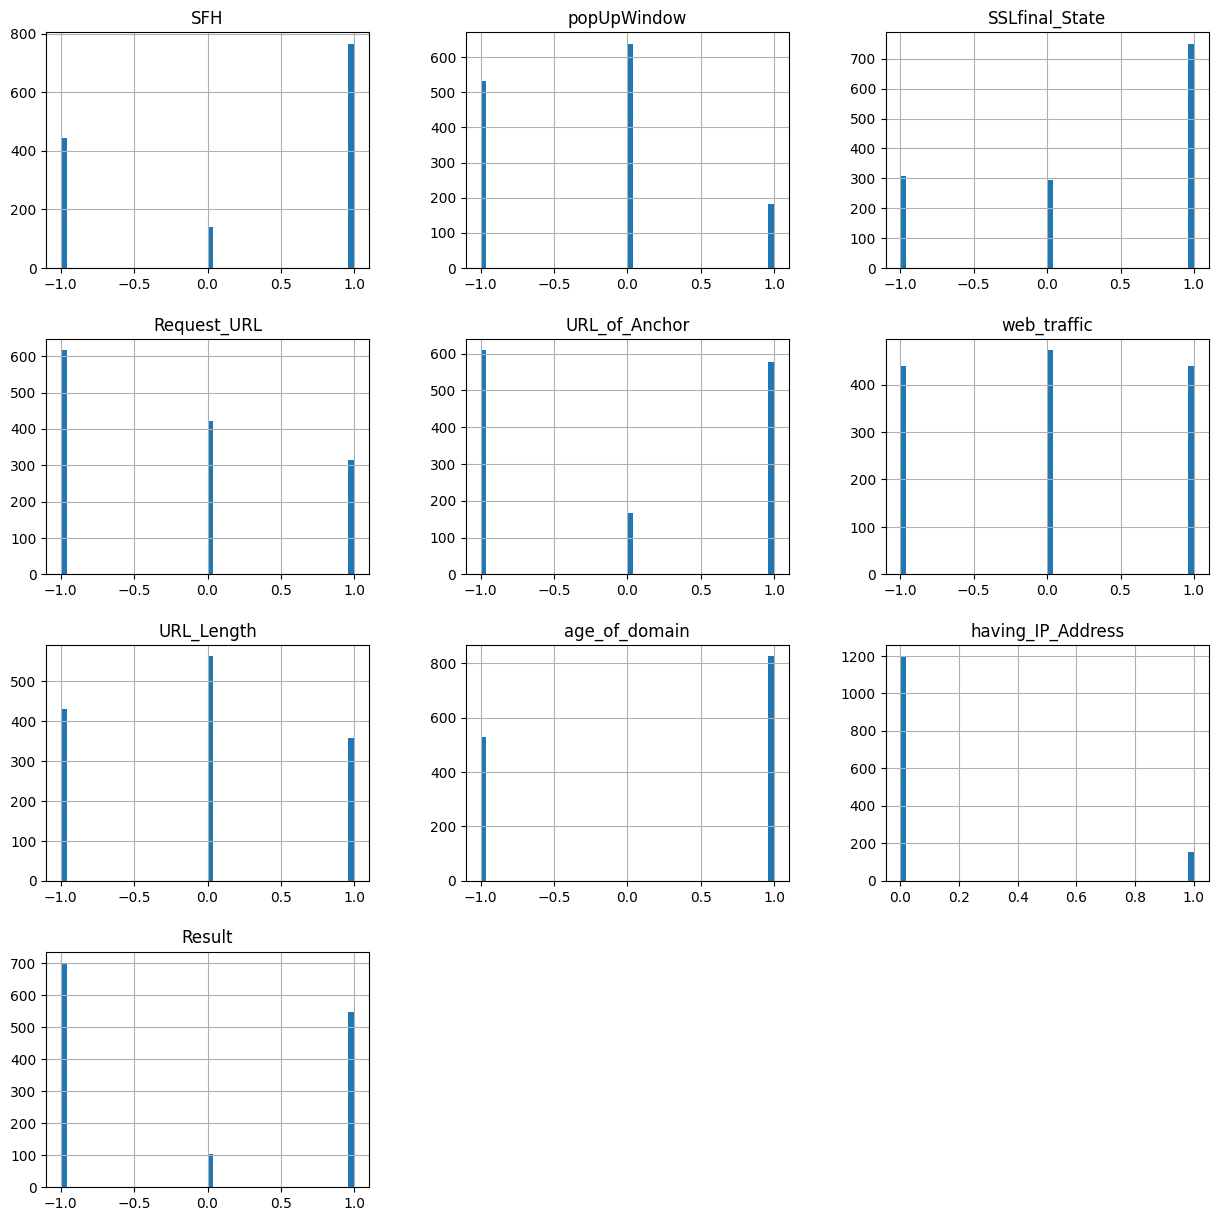

In [213]:
#Plotting the data distribution
data.hist(bins = 50,figsize = (15,15))
plt.show()

#### 绘制热度相关图

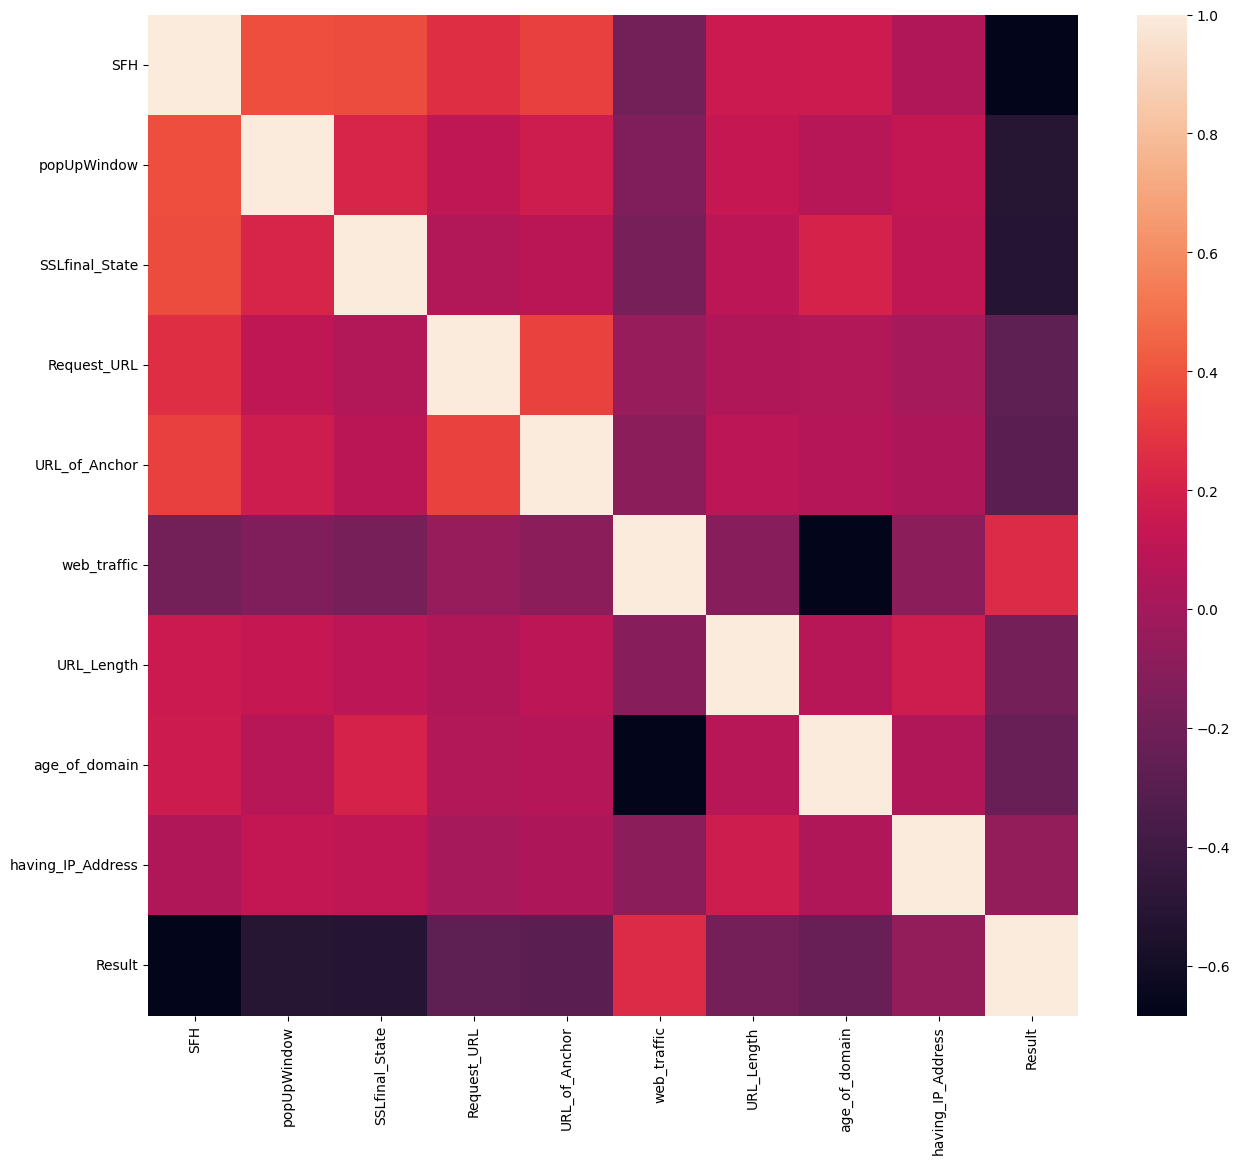

In [214]:
#Correlation heatmap

plt.figure(figsize=(15,13))
sns.heatmap(data.corr())
plt.show()

In [215]:
data.describe()

,SFH,popUpWindow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
count,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000
mean,0.237990,-0.258684,0.327421,-0.223208,-0.025129,0.000000,-0.053215,0.219512,0.114560,-0.113821
std,0.916389,0.679072,0.822193,0.799682,0.936262,0.806776,0.762552,0.975970,0.318608,0.954773
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
25%,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000000
75%,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [216]:
#checking the data for null or missing values
data.isnull().sum()

SFH                  0
popUpWindow          0
SSLfinal_State       0
Request_URL          0
URL_of_Anchor        0
web_traffic          0
URL_Length           0
age_of_domain        0
having_IP_Address    0
Result               0
dtype: int64

In [217]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,SFH,popUpWindow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,1,1,1,0,1,1,-1,0,-1
1,1,1,1,0,0,-1,1,1,1,-1
2,1,0,1,-1,1,-1,1,1,0,-1
3,1,0,1,-1,1,-1,0,1,0,-1
4,1,0,1,1,1,0,-1,-1,0,-1


In [218]:
# Sepratating & assigning features and target columns to X & y
y = data['Result']
X = data.drop('Result',axis=1)
X.shape, y.shape

((1353, 9), (1353,))

### 模型训练

In [219]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((1082, 9), (271, 9))

In [220]:
#importing packages
from sklearn.metrics import accuracy_score

In [221]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

### 决策树


In [222]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 8)
# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8)

In [223]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

In [224]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.950
Decision Tree: Accuracy on test Data: 0.863


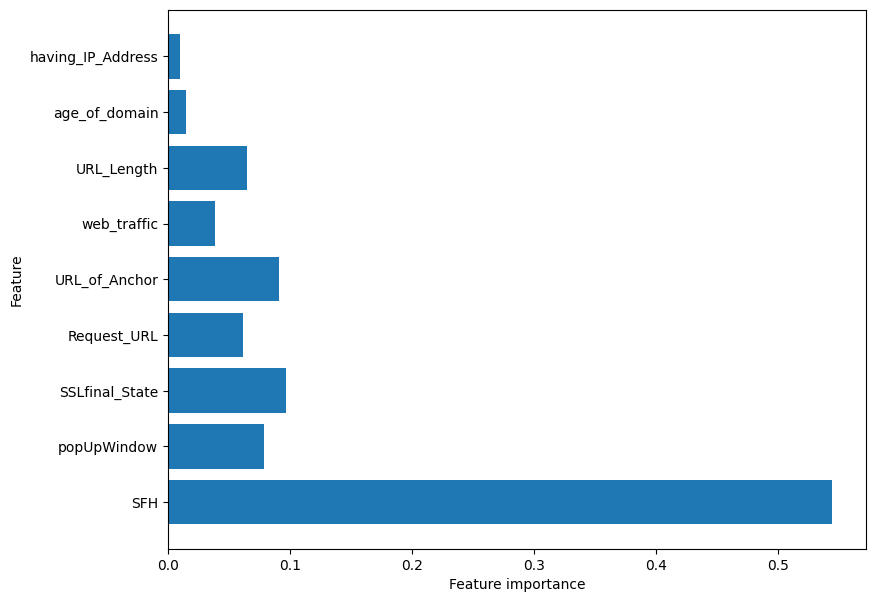

In [225]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [226]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

### 随机森林

In [227]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=15)

# fit the model 
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=15)

In [263]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

In [229]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.965
Random forest: Accuracy on test Data: 0.867


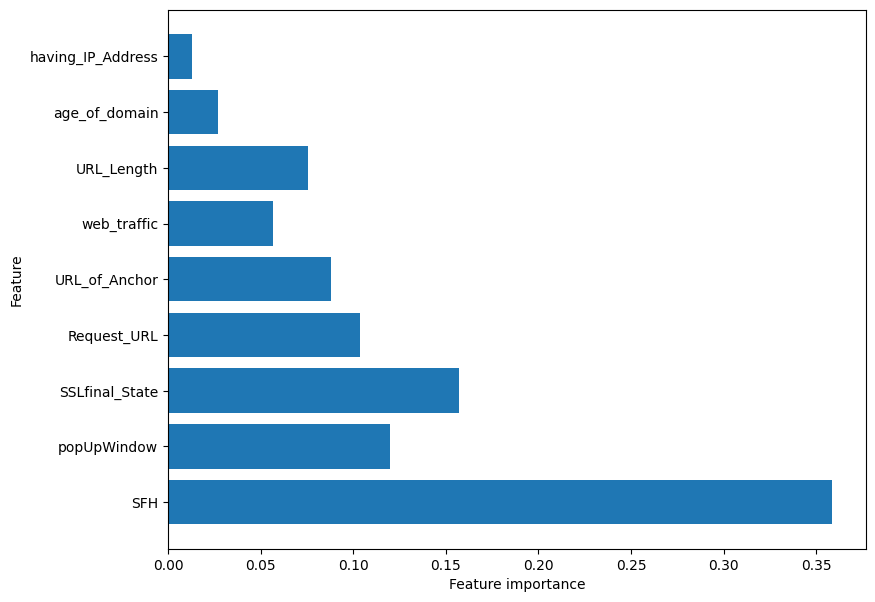

In [230]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [231]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_test_forest)

### MLP

In [232]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# fit the model 
mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [233]:
#predicting the target value from the model for the samples
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

In [234]:
#computing the accuracy of the model performance
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))

Multilayer Perceptrons: Accuracy on training Data: 0.963
Multilayer Perceptrons: Accuracy on test Data: 0.871


In [235]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp)

### XGBoost


In [236]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

# 1. 编码目标变量 y
le = LabelEncoder()
y_train_xgb = le.fit_transform(y_train)
y_test_xgb = le.transform(y_test)

# 2. 创建并训练 XGBoost 模型
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
xgb.fit(X_train, y_train_xgb)

# 3. 评估模型
y_pred = xgb.predict(X_test)

In [237]:
#predicting the target value from the model for the samples
y_test_xgb_1 = xgb.predict(X_test)
y_train_xgb_1 = xgb.predict(X_train)

In [238]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train_xgb,y_train_xgb_1)
acc_test_xgb = accuracy_score(y_test_xgb,y_test_xgb_1)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.965
XGBoost : Accuracy on test Data: 0.871


In [239]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

### SVM


In [240]:
#Support vector machine model
from sklearn.svm import SVC

# instantiate the model
svm = SVC(kernel='linear', C=1.0, random_state=12)
#fit the model
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=12)

In [241]:
#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

In [242]:
#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.848
SVM : Accuracy on test Data: 0.815


In [243]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('SVM', acc_train_svm, acc_test_svm)

### 不同模型比较

In [244]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.950,0.863
1,Random Forest,0.965,0.867
2,Multilayer Perceptrons,0.963,0.871
3,XGBoost,0.965,0.871
4,SVM,0.848,0.815


In [245]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
3,XGBoost,0.965,0.871
2,Multilayer Perceptrons,0.963,0.871
1,Random Forest,0.965,0.867
0,Decision Tree,0.950,0.863
4,SVM,0.848,0.815


### 保存模型

In [280]:
import myutils

myutils.save_model(tree, "tree.dat")

### 检查模型是否被正确保存

In [281]:
# load model from file
loaded_model = pickle.load(open("save_models/DECISION_TREE.dat", "rb"))
loaded_model
from sklearn.metrics import accuracy_score
utils.accuracy_score(y_test, loaded_model.predict(X_test))


0.9188191881918819